In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
import random

2022-10-17 13:09:21.172367: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-17 13:09:26.000422: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdirectml.d6f03b303ac3c4f2eeb8ca631688c9757b361310.so
2022-10-17 13:09:26.000680: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdxcore.so
2022-10-17 13:09:26.071657: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libd3d12.so
2022-10-17 13:09:38.726268: I tensorflow/c/logging.cc:34] DirectML device enumeration: found 1 compatible adapters.


Прогнозирование

In [2]:
def func(t: float):
    return np.sin(-2*t**2 + 7*t)

In [3]:
h = 0.001
t = (0, 5)
D = 5
ans_x = np.arange(t[0],t[1] + h, h)
ans = func(ans_x)

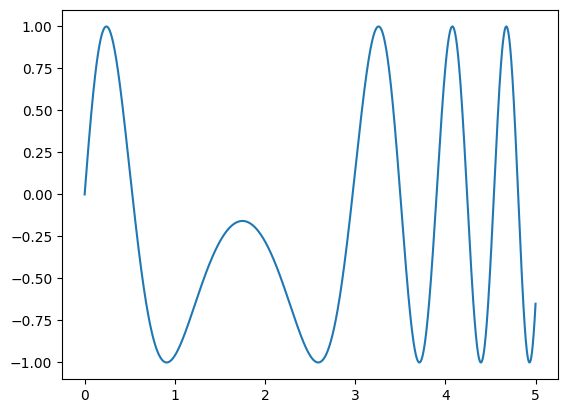

In [4]:
plt.plot(ans_x, ans)

In [5]:
X = [ans[i:i+D].tolist() for i in range(0, len(ans) - D)]
y = [ans[i] for i in range(D, len(ans))]

In [6]:
predictor =  keras.Sequential([
        layers.Dense(1,input_dim=D, activation="linear", name="pred"),
    ]
)
opt = keras.optimizers.SGD(learning_rate=0.1)
predictor.compile(loss='mse', optimizer=opt, metrics=['mae'])

2022-10-17 13:09:56.575592: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-17 13:09:56.578990: I tensorflow/c/logging.cc:34] DirectML: creating device on adapter 0 (Radeon(TM) 540 Graphics)
2022-10-17 13:10:00.307571: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-17 13:10:00.307653: W tensorflow/core/common_runtime/pluggable_device/pluggable_device_bfc_allocator.cc:28] Overriding allow_growth setting because force_memory_growth was requested by the device.
2022-10-17 13:10:00.307701: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

In [19]:
predictor.fit(X, y, batch_size=1, epochs=2, shuffle=True)

Epoch 1/2
217/217 [==============================] - 4s 18ms/step - loss: 1.8349e-04 - mae: 0.0101
Epoch 2/2
217/217 [==============================] - 4s 18ms/step - loss: 1.6822e-04 - mae: 0.0099


In [8]:
my_ans = predictor.predict(X).flatten()

 15/157 [=>............................] - ETA: 1s

2022-10-17 13:21:32.263390: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


157/157 [==============================] - 2s 8ms/step


2022-10-17 13:21:33.578379: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-17 13:21:33.578630: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 5045 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2022-10-17 13:21:33.813498: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-17 13:21:33.813657: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 5045 MB memory) -> physical PluggableDevice (device: 0, name: DM

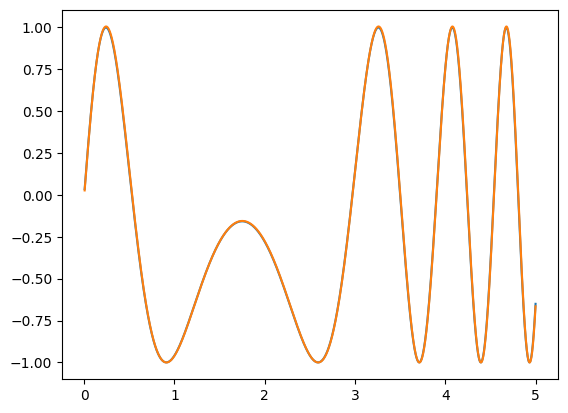

In [9]:
plt.plot(ans_x[D:], y)
plt.plot(ans_x[D:], my_ans)

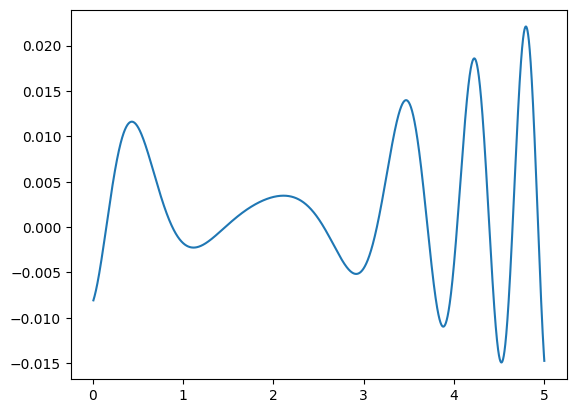

In [10]:
errors = my_ans - y
plt.plot(ans_x[D:], errors)

In [11]:
def noized(t):
    return np.sin(2.5*t**2 - 5*t)

def resl_sig(t):
    return np.sin(2.5*t**2 - 5*t + 4*np.pi)/3

In [12]:
h = 0.01
t = (0, 2.2)
D = 4

In [13]:
x_points = np.arange(t[0], t[1] + h, h)
noized_points = noized(x_points)
real_points = resl_sig(x_points)

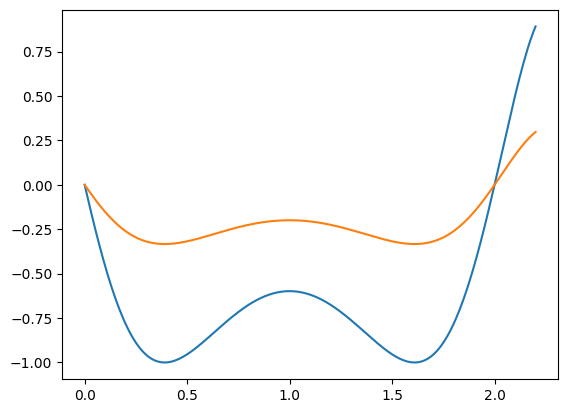

In [14]:
plt.plot(x_points, noized_points)
plt.plot(x_points, real_points)

In [24]:
X = [noized_points[i:i+D].tolist() for i in range(0, len(noized_points) - D)]
y = [real_points[i] for i in range(D, len(real_points))]

In [28]:
predictor =  keras.Sequential([
        layers.Dense(1,input_dim=D, activation="linear", name="pred"),
    ]
)
opt = keras.optimizers.SGD(learning_rate=0.01)
predictor.compile(loss='mse', optimizer=opt, metrics=['mae'])

In [31]:
predictor.fit(X, y, batch_size=1, epochs=10, shuffle=True)

Epoch 1/10
217/217 [==============================] - 5s 25ms/step - loss: 8.5785e-04 - mae: 0.0210
Epoch 2/10
217/217 [==============================] - 4s 21ms/step - loss: 8.4062e-04 - mae: 0.0209
Epoch 3/10
217/217 [==============================] - 4s 19ms/step - loss: 8.2105e-04 - mae: 0.0206
Epoch 4/10
217/217 [==============================] - 4s 18ms/step - loss: 8.1276e-04 - mae: 0.0207
Epoch 5/10
217/217 [==============================] - 4s 18ms/step - loss: 7.9322e-04 - mae: 0.0204
Epoch 6/10
217/217 [==============================] - 5s 24ms/step - loss: 7.8898e-04 - mae: 0.0204
Epoch 7/10
217/217 [==============================] - 4s 20ms/step - loss: 7.7789e-04 - mae: 0.0203
Epoch 8/10
217/217 [==============================] - 4s 19ms/step - loss: 7.5215e-04 - mae: 0.0201
Epoch 9/10
217/217 [==============================] - 4s 18ms/step - loss: 7.4199e-04 - mae: 0.0197
Epoch 10/10
217/217 [==============================] - 4s 19ms/step - loss: 7.3435e-04 - mae: 0.0197

In [32]:
my_denoized = predictor.predict(X).flatten()

7/7 [==============================] - 0s 9ms/step


2022-10-17 13:33:43.936813: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


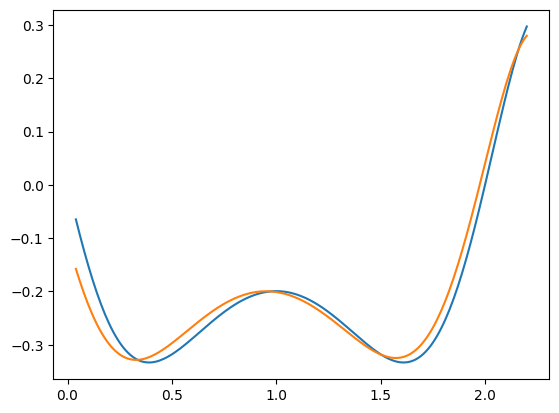

In [33]:
plt.plot(x_points[D:], y)
plt.plot(x_points[D:], my_denoized)

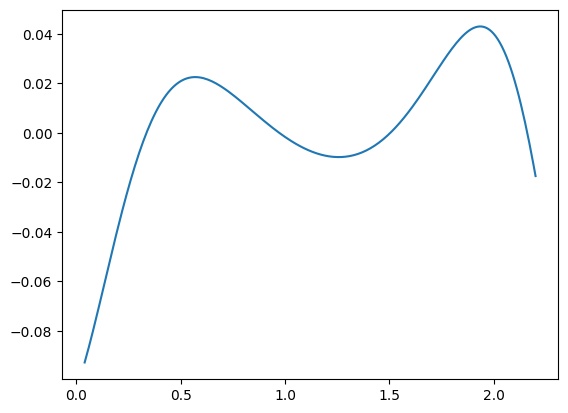

In [35]:
errors = my_denoized - y
plt.plot(x_points[D:], errors)